# semseg/predict

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import torch
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import seed
from roofAI.semseg import Profile
from roofAI.semseg.model import SemSegModel
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2362.1-unknown, built on 09 October 2023, 18:17:48


In [2]:
profile = Profile.QUICK # FULL, QUICK, VALIDATION
dataset_object = "roofAI-CamVid-v2"
model_object = "roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403"
prediction_object = objects.unique_object("roofAI-CamVid-semseg-prediction")

📂 roofAI-CamVid-semseg-prediction-2023-10-09-18-17-48-49996


In [3]:
dataset_path=objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object
    )

In [4]:
model = SemSegModel(objects.path_of("model.pth", object_name=model_object))

SemSegModel.load(/Users/kamangir/storage/abcli/roofAI-CamVid-semseg-model-2023-10-09-15-03-04-67403/model.pth)
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
SemSegModel: se_resnext50_32x4d[imagenet]-sigmoid-> car


In [5]:
x_test_dir = os.path.join(dataset_path, 'test')
y_test_dir = os.path.join(dataset_path, 'testannot')

In [6]:
from roofAI.semseg.augmentation import get_validation_augmentation, get_preprocessing
from roofAI.semseg.dataloader import Dataset
import segmentation_models_pytorch as smp
from roofAI.semseg.utils import visualize

In [7]:
# test dataset without transformations for image visualization
test_dataset_vis = Dataset(
    x_test_dir,
    y_test_dir, 
    classes=model.classes,
    count=profile.data_count
)

Dataset: 20 item(s).


In [8]:
preprocessing_fn = smp.encoders.get_preprocessing_fn(
    model.encoder_name,
    model.encoder_weights,
)

In [9]:
test_dataset = Dataset(
    x_test_dir,
    y_test_dir,
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=model.classes,
    count=profile.data_count,
)

Dataset: 20 item(s).


In [10]:
DEVICE="cpu"  # 'cuda'

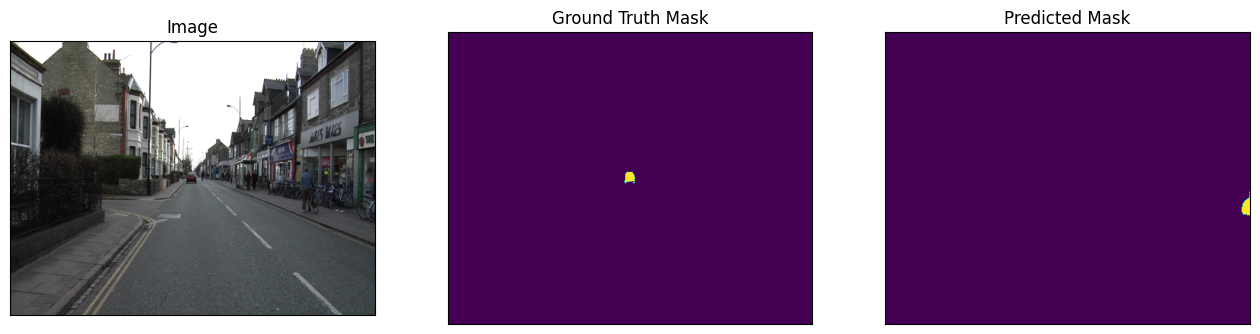

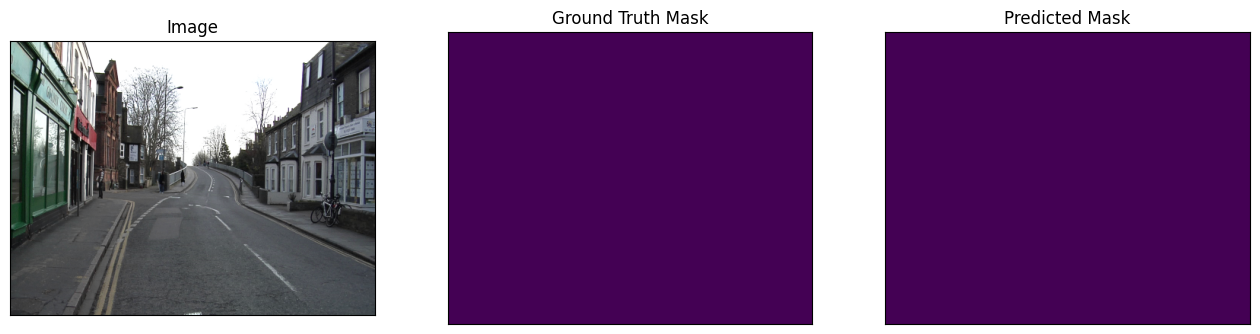

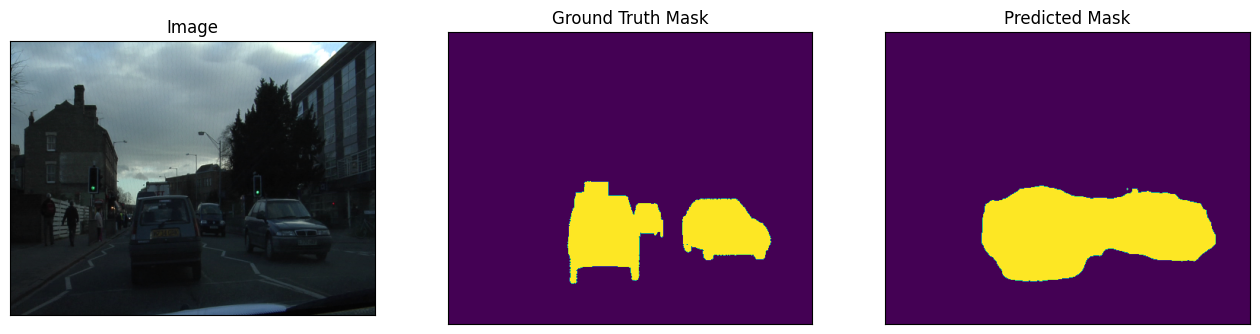

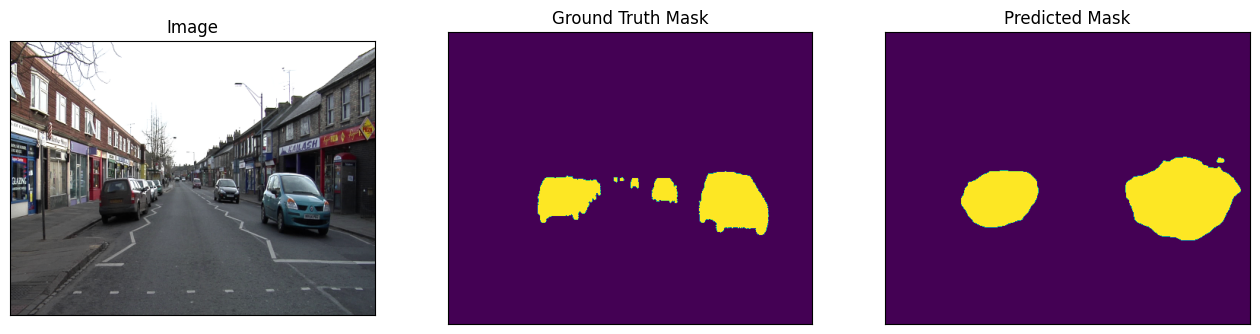

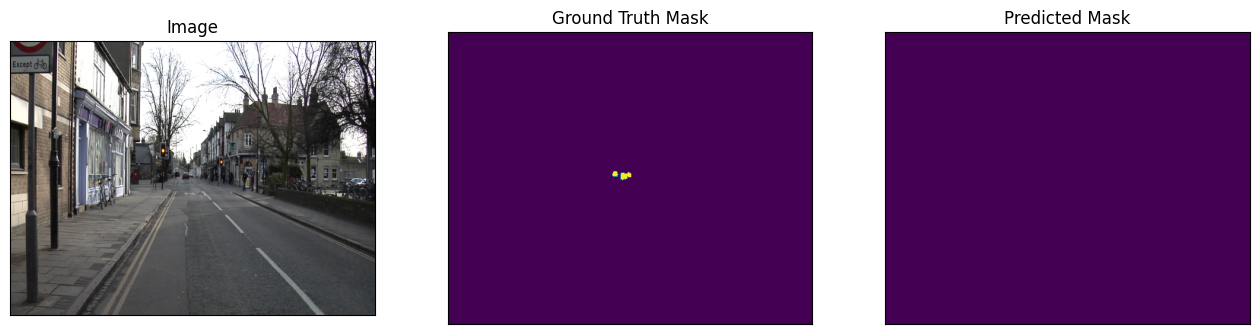

In [11]:
for i in range(1 if profile == Profile.VALIDATION else 5):
    n = np.random.choice(len(test_dataset))
    
    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset[n]
    
    gt_mask = gt_mask.squeeze()
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = model.model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )

In [12]:
%%bash -s $prediction_object
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

prediction_object=$1

abcli select $prediction_object
abcli tag set . built_by_notebook
# abcli upload

📂 abcli: roofAI-CamVid-semseg-prediction-2023-10-09-18-17-48-49996


roofAI-CamVid-semseg-prediction-2023-10-09-18-17-48-49996 += #built_by_notebook.


In [13]:
seed.log(
    "download_object",
    object_name=prediction_object)

abcli select roofAI-CamVid-semseg-prediction-2023-10-09-18-17-48-49996
abcli download
open .


In [14]:
# END